In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('training_data')
X_train = train.drop('output', axis = 1)
y_train = train['output']
test = pd.read_csv('testing_data')
X_test = test.drop('output', axis = 1)
y_test = test['output']

In [3]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under_train, y_under_train = undersample.fit_resample(X_train, y_train)
print("Undersampled class distribution:", Counter(y_under_train))

Undersampled class distribution: Counter({0: 7506, 1: 7506})


In [5]:
import lightgbm as lgb

In [21]:
model = lgb.LGBMClassifier(n_estimators = 200,learning_rate=0.09,max_depth=-5,random_state=42)

In [23]:
model.fit(X_train,y_train,
          eval_metric='logloss')

[LightGBM] [Info] Number of positive: 7506, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1704
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005789 -> initscore=-5.146050
[LightGBM] [Info] Start training from score -5.146050


LGBMClassifier(learning_rate=0.09, max_depth=-5, n_estimators=200,
               random_state=42)

In [29]:
pred = model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(roc_auc_score(y_test,pred))

[[552051   1523]
 [  1128   1017]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.40      0.47      0.43      2145

    accuracy                           1.00    555719
   macro avg       0.70      0.74      0.72    555719
weighted avg       1.00      1.00      1.00    555719

0.7356873305496254


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

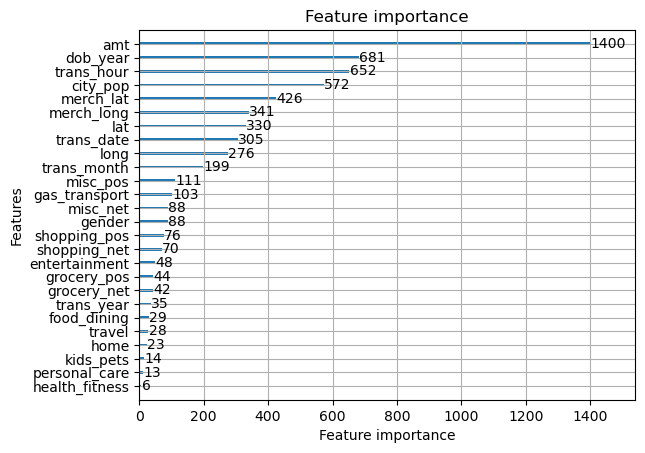

In [37]:
lgb.plot_importance(model)

### Undersampling Majority Data

In [63]:
model3 = lgb.LGBMClassifier(n_estimators = 200,learning_rate=0.09,max_depth=-5,random_state=42)

In [65]:
model3.fit(X_under_train,y_under_train,
          eval_metric='logloss')

[LightGBM] [Info] Number of positive: 7506, number of negative: 7506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1708
[LightGBM] [Info] Number of data points in the train set: 15012, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.09, max_depth=-5, n_estimators=200,
               random_state=42)

In [67]:
pred3 = model3.predict(X_test)

In [69]:
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))
print(roc_auc_score(y_test,pred3))

[[542216  11358]
 [    66   2079]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.15      0.97      0.27      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.97      0.63    555719
weighted avg       1.00      0.98      0.99    555719

0.9743565935594464


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

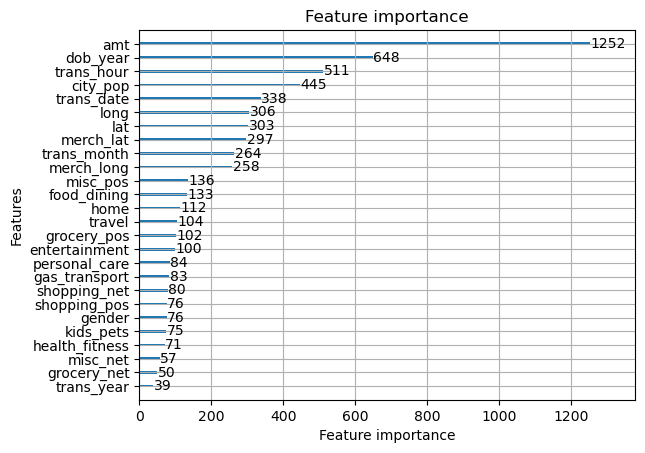

In [75]:
lgb.plot_importance(model3)

### Using Label Encoding instead of One Hot encoding

In [39]:
train1 = pd.read_csv('training_data_label_encoded')
X_train1 = train1.drop('is_fraud', axis = 1)
y_train1= train1['is_fraud']
test1 = pd.read_csv('testing_data_label_encoded')
X_test1 = test1.drop('is_fraud', axis = 1)
y_test1 = test1['is_fraud']

In [41]:
model1 = lgb.LGBMClassifier(n_estimators = 200,learning_rate=0.09,max_depth=-5,random_state=42)
model1.fit(X_train1,y_train1,
          eval_metric='logloss')

[LightGBM] [Info] Number of positive: 7506, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1690
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005789 -> initscore=-5.146050
[LightGBM] [Info] Start training from score -5.146050


LGBMClassifier(learning_rate=0.09, max_depth=-5, n_estimators=200,
               random_state=42)

In [43]:
pred1 = model1.predict(X_test1)

In [45]:
print(confusion_matrix(y_test1,pred1))
print(classification_report(y_test1,pred1))
print(roc_auc_score(y_test1,pred1))

[[552899    675]
 [   609   1536]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.69      0.72      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.85      0.86      0.85    555719
weighted avg       1.00      1.00      1.00    555719

0.8574322834546401


### Under sampling Majority Data along with Label Encoding

In [49]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under_train1, y_under_train1 = undersample.fit_resample(X_train1, y_train1)
print("Undersampled class distribution:", Counter(y_under_train1))

Undersampled class distribution: Counter({0: 7506, 1: 7506})


In [51]:
model2 = lgb.LGBMClassifier(n_estimators = 200,learning_rate=0.09,max_depth=-5,random_state=42)
model2.fit(X_under_train1,y_under_train1,
          eval_metric='logloss')

[LightGBM] [Info] Number of positive: 7506, number of negative: 7506
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1695
[LightGBM] [Info] Number of data points in the train set: 15012, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.09, max_depth=-5, n_estimators=200,
               random_state=42)

In [53]:
pred2 = model2.predict(X_test1)

In [55]:
print(confusion_matrix(y_test1,pred2))
print(classification_report(y_test1,pred2))
print(roc_auc_score(y_test1,pred2))

[[541319  12255]
 [    74   2071]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.14      0.97      0.25      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.97      0.62    555719
weighted avg       1.00      0.98      0.99    555719

0.9716816019097195


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

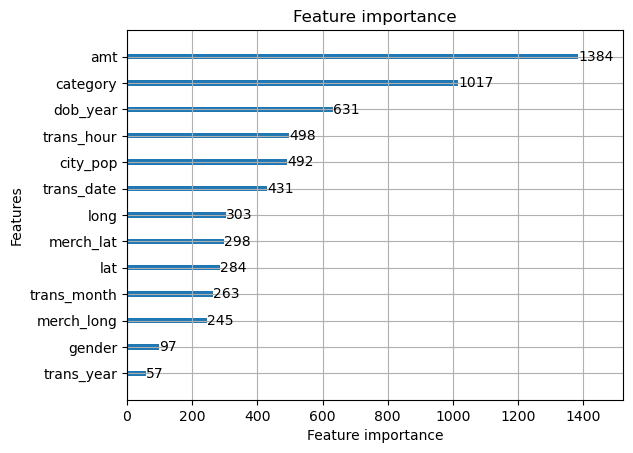

In [73]:
lgb.plot_importance(model2)